# Data
The data for this case study is publicly available on Yahoo Finance, and it includes information about a company’s daily stock values from 2010 through 2020.

In [1]:
import yfinance as yf

ticker = "AAPL"  # Replace with the ticker symbol of the company you want to analyze
start_date = "2010-01-01"
end_date = "2020-12-31"

stock_prices_data = yf.download(ticker, start=start_date, end=end_date)

stock_prices_data.to_csv("stock_prices_data.csv")

[*********************100%***********************]  1 of 1 completed


This code downloads Apple Inc. (AAPL) daily stock prices from January 1, 2010 to December 31, 2020 and saves the data in a CSV file called “stock_prices_data.csv.” You can change the code to obtain data for a different firm or time period.

After downloading the stock market data, save it to the Hadoop Distributed File System (HDFS).

In [5]:
!apt-get update
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar -xvzf spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,311 kB]
Get:14 http://security.ubuntu.com/u

In [10]:


from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
        .appName("StockPrices") \
        .getOrCreate()

# Load the data (assuming it's a CSV file)
stock_prices_df = spark.read \
                .option("header", "true") \
                .option("inferSchema", "true") \
                .csv("/content/stock_prices_data.csv")  # Specify the file path

# Show the DataFrame
stock_prices_df.show()


+----------+------------------+------------------+------------------+------------------+------------------+----------+
|      Date|              Open|              High|               Low|             Close|         Adj Close|    Volume|
+----------+------------------+------------------+------------------+------------------+------------------+----------+
|2010-01-04| 7.622499942779541| 7.660714149475098| 7.585000038146973| 7.643214225769043| 6.454505920410156| 493729600|
|2010-01-05| 7.664286136627197| 7.699643135070801|7.6160712242126465| 7.656428813934326| 6.465665817260742| 601904800|
|2010-01-06| 7.656428813934326|  7.68678617477417| 7.526785850524902| 7.534643173217773| 6.362820148468018| 552160000|
|2010-01-07|            7.5625|7.5714287757873535| 7.466071128845215| 7.520713806152344| 6.351057052612305| 477131200|
|2010-01-08| 7.510714054107666|7.5714287757873535| 7.466429233551025| 7.570713996887207| 6.393280029296875| 447610800|
|2010-01-11| 7.599999904632568| 7.60714292526245

In [11]:
from pyspark.sql.functions import mean, stddev, corr

mean_price = stock_prices_df.select(mean("Close")).first()[0]
stddev_price = stock_prices_df.select(stddev("Close")).first()[0]
corr_price_volume = stock_prices_df.select(corr("Close", "Volume")).first()[0]

print("Mean Price:", mean_price)
print("Standard Deviation Price:", stddev_price)
print("Correlation between Price and Volume:", corr_price_volume)

Mean Price: 33.74180247156606
Standard Deviation Price: 24.50512204251941
Correlation between Price and Volume: -0.4895479106145594


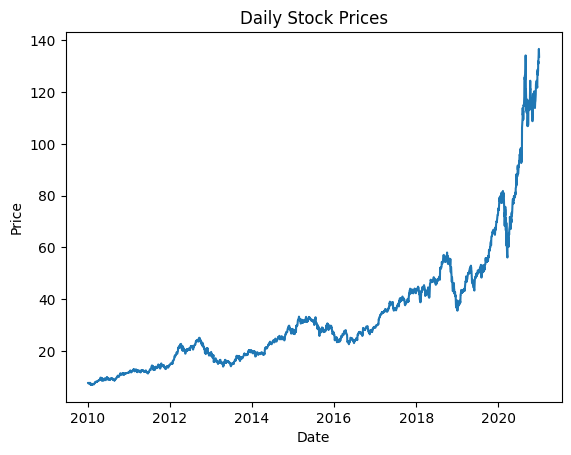

In [12]:
import matplotlib.pyplot as plt

prices = stock_prices_df.select("Date", "Close").collect()
dates = [row.Date for row in prices]
prices = [row.Close for row in prices]

plt.plot(dates, prices)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Daily Stock Prices")
plt.show()